# Notebook to plot the helicity angles of $a_{0}$

In [1]:
import ROOT
import numpy as np
import my_library.common_analysis_tools as ct
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import pandas as pd

Welcome to JupyROOT 6.24/04


In [2]:
df_pipkmks = ct.get_dataframe("pipkmks", 'spring', 'data')

In [3]:
df_pipkmks = df_pipkmks.Define('kk_px', 'km_px + ks_px')
df_pipkmks = df_pipkmks.Define('kk_py', 'km_py + ks_py')
df_pipkmks = df_pipkmks.Define('kk_pz', 'km_pz + ks_pz')
df_pipkmks = df_pipkmks.Define('kk_E', 'km_E + ks_E')

In [4]:
df_pipkmks = df_pipkmks.Define("beam_p4", "ROOT::Math::PxPyPzEVector(e_beam, 0, 0, e_beam)")
df_pipkmks = df_pipkmks.Define("target_p4", "ROOT::Math::PxPyPzEVector(0, 0, 0, 0.938272)")

In [5]:
df_pipkmks = df_pipkmks.Define('cm_boost_vector', '(beam_p4 + target_p4).BoostToCM()')

In [6]:
df_pipkmks = df_pipkmks.Define('p_p4', 'ROOT::Math::PxPyPzEVector(p_px, p_py, p_pz, p_E)')
df_pipkmks = df_pipkmks.Define('pipkmks_p4', 'ROOT::Math::PxPyPzEVector(pipkmks_px, pipkmks_py, pipkmks_pz, pipkmks_E)')
df_pipkmks = df_pipkmks.Define('kk_p4', 'ROOT::Math::PxPyPzEVector(kk_px, kk_py, kk_pz, kk_E)')
df_pipkmks = df_pipkmks.Define('pip1_p4', 'ROOT::Math::PxPyPzEVector(pip1_px, pip1_py, pip1_pz, pip1_E)')


In [7]:
df_pipkmks = df_pipkmks.Define('cm_boost', "ROOT::Math::Boost(cm_boost_vector)")

In [8]:
df_pipkmks = df_pipkmks.Define('p_p4_cm', 'cm_boost(p_p4)')
df_pipkmks = df_pipkmks.Define('pipkmks_p4_cm', 'cm_boost(pipkmks_p4)')
df_pipkmks = df_pipkmks.Define('kk_p4_cm', 'cm_boost(kk_p4)')
df_pipkmks = df_pipkmks.Define('pip1_p4_cm', 'cm_boost(pip1_p4)')
df_pipkmks = df_pipkmks.Define('beam_p4_cm', 'cm_boost(beam_p4)')
df_pipkmks = df_pipkmks.Define('target_p4_cm', 'cm_boost(target_p4)')

In [9]:
df_pipkmks = df_pipkmks.Define('f1_rest_boost_vector', 'pipkmks_p4_cm.BoostToCM()')
df_pipkmks = df_pipkmks.Define('f1_rest_boost', 'ROOT::Math::Boost(f1_rest_boost_vector)')
df_pipkmks = df_pipkmks.Define('kk_p4_rest', 'f1_rest_boost(kk_p4_cm)')
df_pipkmks = df_pipkmks.Define('pip1_p4_rest', 'f1_rest_boost(pip1_p4_cm)')


In [10]:
df_pipkmks = df_pipkmks.Define('yhat', 'beam_p4_cm.Vect().Cross(pipkmks_p4_cm.Vect()).Unit()')
df_pipkmks = df_pipkmks.Define('zhat', 'pipkmks_p4_cm.Vect().Unit()')
df_pipkmks = df_pipkmks.Define('xhat', 'yhat.Cross(zhat)')

In [11]:
df_pipkmks = df_pipkmks.Define('kk_rest_p3', 'kk_p4_rest.Vect()')
df_pipkmks = df_pipkmks.Define('kk_helicty_p3', 'ROOT::Math::XYZVector(kk_rest_p3.Dot(xhat), kk_rest_p3.Dot(yhat), kk_rest_p3.Dot(zhat))')

In [12]:
df_pipkmks = df_pipkmks.Define('kk_helicity_costheta', 'kk_helicty_p3.Z()/sqrt(kk_helicty_p3.Mag2())')

In [13]:
hist_1285_kk_costheta = df_pipkmks.Filter('pipkmks_m < 1.32 && pipkmks_m > 1.24').Histo1D(('1285_kk_costheta', '1285_kk_costheta', 25, -1.1, 1.1), 'kk_helicity_costheta').GetValue()

In [14]:
func_eta = ROOT.TF1("func_eta", "[0]", -1, 1)
func_f1 = ROOT.TF1("func_f1", "[0]*cos(x)*cos(x) + [1]*sin(x)*sin(x)", -1, 1)

func_eta.SetParameter(0, 600)
func_f1.SetParameter(0, -600)
func_f1.SetParameter(1, 200)

In [15]:
hist_1285_kk_costheta.Fit(func_eta, "BS+")
hist_1285_kk_costheta.Fit(func_f1, "BS+")

 FCN=6009.56 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=2.08528e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.84932e+02   2.83558e+00   1.07341e-01   7.20203e-10
 FCN=2302.03 FROM MIGRAD    STATUS=CONVERGED      30 CALLS          31 TOTAL
                     EDM=5.2971e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.45150e+02   6.56039e+00   1.20206e-01   1.89153e-11
   2  p1          -1.71743e+02   6.50796e+00   1.19245e-01   1.71610e-11


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


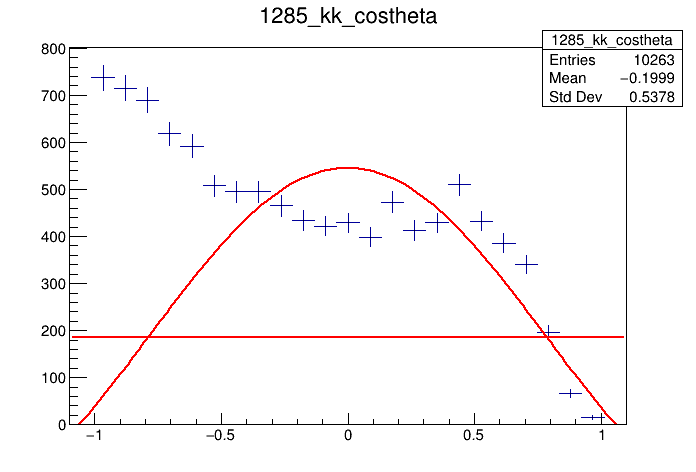

In [16]:
c = ROOT.TCanvas()
hist_1285_kk_costheta.Draw("E")
c.Draw()